#Instalación de las librerías

In [54]:
!pip install pint

In [55]:
# download modsim.py
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

#Modelo poblacional
Vamos a simular con un modelo la obtención de datos históricos de población ya conocidos. Es decir, vamos a ajustar un modelo a estos datos, para obtener las ecuaciones que modelan al sistema.
Al obtener el modelo poblacional podemos llegar a estimar la población en los sgtes. años.
Los datos poblacionales los obtendremos de un artículo de wikipedia acerca de la población mundial.


Importamos las librerías y obtenemos las tablas del artículo

In [56]:
from pandas import read_html
import pandas as pd
import modsim as ms
from matplotlib import pyplot

url = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"

tablas = pd.read_html(url, header=0, index_col=0, decimal='M')

tabla_poblacion = tablas[2] #guardamos en una variable la tercer tabla del artículo

In [57]:
from modsim import *

In [58]:
tablas

[                               1400       1500       1600       1700  \
 Year                                                                   
 population (in billions)  0.35–0.40  0.43–0.50  0.50–0.58  0.60–0.68   
 growth p.a.[1]                  >0%     <0.12%  0.15–0.3%  0.1–0.15%   
 
                                1800       1900       2000      2100  
 Year                                                                 
 population (in billions)  0.89–0.98  1.56–1.71  6.06–6.15  c. 10–13  
 growth p.a.[1]             0.3–0.5%   0.5–0.6%   1.3–1.4%  0.7–0.8%  ,
        PRB (1973–2016)[15]  UN (2015)[16] Maddison (2008)[17] HYDE (2010)[18]  \
 Year                                                                            
 −10000                 NaN            NaN                 NaN          2M[25]   
 −9000                  NaN            NaN                 NaN              4.   
 −8000                   5.            NaN                 NaN              5.   
 −7000     

In [59]:
tabla_poblacion

,United States Census Bureau (2017)[29],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[25],Tanton (1994)[19],Biraben (1980)[20],McEvedy & Jones (1978)[21],Thomlinson (1975)[22],Durand (1974)[23],Clark (1967)[24]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le modificamos los nombres a las columnas para luego trabajar sólo con dos de ellas.

In [60]:
tabla_poblacion.columns = [ 'census' , 'prb' , 'un' , 'maddison' ,'hyde' , 'tanton' , 'biraben' , 'mj' ,'thomlinson' , 'durand' , 'clark' ]

In [61]:
tabla_poblacion.census
tabla_poblacion.un

Year
1950    2.525149e+09
1951    2.572851e+09
1952    2.619292e+09
1953    2.665865e+09
1954    2.713172e+09
            ...     
2012    7.080072e+09
2013    7.162119e+09
2014    7.243784e+09
2015    7.349472e+09
2016             NaN
Name: un, Length: 67, dtype: float64

Dividimos los valores de población por 1x10^9 para que nos queden más cómodos para trabajar

In [62]:
censo = tabla_poblacion.census/1e9
un = tabla_poblacion.un/1e9

In [63]:
censo

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
          ...   
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: census, Length: 67, dtype: float64

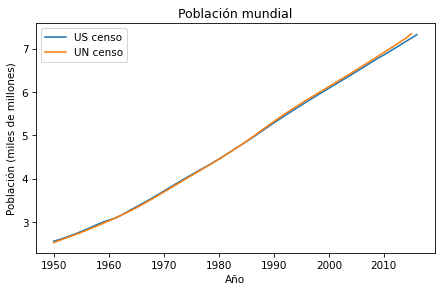

In [64]:
censo.plot( label="US censo")
un.plot(label="UN censo")
ms.decorate(title='Población mundial', xlabel='Año', ylabel='Población (miles de millones)')

##Modelo constante
Si suponemos que la polación crece a una tasa constante, es decir, año a año crece en la misma proporción, suponemos un crecimiento lineal y constante de la población. Por lo tanto, se modelará con una ecuación lineal, donde:
nueva población es la suma de la población del año anterior y su crecimiento anual.

In [65]:
censo[1950]

2.557628654

Incremento de la población durante todo el periodo -> Diferencia de la población entre el primer año y el último

In [66]:
incremento_total = censo[2016] - censo[1950] #población en 2016 - población en 1950

Y el incremento anual?

In [67]:
cant_anios = 2016 - 1950
incremento_anual = incremento_total / cant_anios

Cómo calcularíamos la población año a año?

Nuestra ecuación que calcula la población en base a un creciemiento anual constante es:

In [68]:
poblacion_1951 = 0
poblacion_1951 = censo[1950] + incremento_anual

In [69]:
poblacion_1951

2.6298766548333337

In [70]:
censo[1951]

2.594939877

Para parametrizar nuestras variables:

Para obtener el primer valor de la tabla y el último:

In [71]:
censo[1950]
#censo[2016]

2.557628654

In [72]:
#variables
t_inicial = 1950
t_final = 2016

pobl_incial = censo[t_inicial]
pobl_final = censo[t_final]

#cálculo del incremento anual y total de la población
cant_anios = t_final - t_inicial
incremento_total = pobl_final - pobl_incial
incremento_anual = incremento_total / cant_anios

#cálculo de la población
# lo calculamos para 1951 como : poblacion_1951 = censo[1950] + incremento_anual
#                                poblacion[t+1] = censo[t] + incremento_anual

In [73]:
incremento_anual

0.07224800083333333

La simulación empieza desde el primer año hasa el último año, es decir, desde 1950 a 2016.
- Escribir una función para calcular la nueva población por año.

In [74]:
for i in range(t_inicial, t_final+1):
  print(i)

1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [75]:
for i in ms.linrange(t_inicial, t_final):
  print(i)
print(type(i))

1950.0
1951.0
1952.0
1953.0
1954.0
1955.0
1956.0
1957.0
1958.0
1959.0
1960.0
1961.0
1962.0
1963.0
1964.0
1965.0
1966.0
1967.0
1968.0
1969.0
1970.0
1971.0
1972.0
1973.0
1974.0
1975.0
1976.0
1977.0
1978.0
1979.0
1980.0
1981.0
1982.0
1983.0
1984.0
1985.0
1986.0
1987.0
1988.0
1989.0
1990.0
1991.0
1992.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
2002.0
2003.0
2004.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
2012.0
2013.0
2014.0
2015.0
2016.0
<class 'numpy.float64'>


In [76]:
b = ms.linrange(t_inicial,t_final)
type(b)

numpy.ndarray

In [77]:
a = range(t_inicial,t_final)
type(a)

range

In [78]:
a = list(range(t_inicial,t_final))
type(a)

list

Cálculo de la población;
 para 1951 lo habíamos calculado así:

```
poblacion_1951 = censo[1950] + incremento_anual
poblacion[t+1] = censo[t] + incremento_anual
```
debería ser algo así:
```
for t in ms.linrange(t_inicial, t_final):
  poblacion[t+1] = poblacion[t] + incremento_anual
  ```


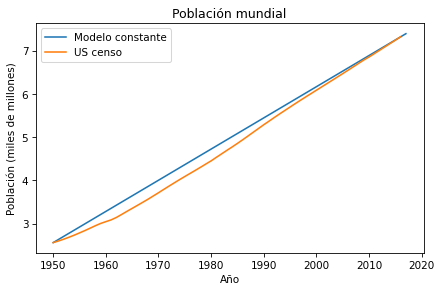

In [79]:
#Simulación
"""
Inicia en 1950, finaliza en 2016.
Calcula las poblaciones en cada año, considerando un crecimiento constante
"""
poblacion = ms.TimeSeries()
poblacion[t_inicial] = censo[t_inicial] #Asigno el año y valor inicial de la población

for t in ms.linrange(t_inicial, t_final):
    poblacion[t+1] = poblacion[t] + incremento_anual

#Gráfica
poblacion.plot(label="Modelo constante")
censo.plot(label="US censo")
#un.plot(label="UN censo")
ms.decorate(title='Población mundial', xlabel='Año', ylabel='Población (miles de millones)')

Entre los años 1960 y 1980 aproximadamente, la recta no representa de manera muy exacta a nuestro modelo.

###Ajustando el modelo constante
Suponemos que tomamos a partir del año 1970 que es donde se ve una mayor linealidad en los datos de la población.
Si consideramos la linealidad, cómo estimaríamos la población para el 2022?
Sería correcto considerar que la población crece linealmente?

2016


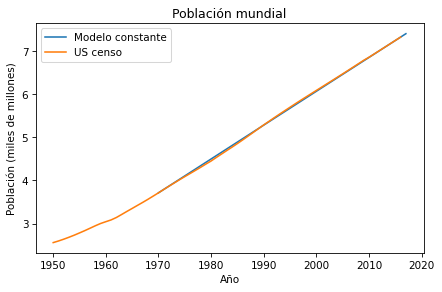

In [80]:
from pandas.io.html import urlopen
import modsim as ms
import pandas as pd
from matplotlib import pyplot

#Extraemos y procesamos los datos
url = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"
tablas = pd.read_html(url, header=0,index_col=0, decimal='M')
tabla_poblacion = tablas[2]
tabla_poblacion.columns = [ 'census' , 'prb' , 'un' , 'maddison' ,'hyde' , 'tanton' , 'biraben' , 'mj' ,'thomlinson' , 'durand' , 'clark' ]
censo = tabla_poblacion.census/1e9
un = tabla_poblacion.un/1e9

#Parámetros
t_0 = 1970 # ajustando el modelo constante
t_end = 2016
print(t_end)
#t_end =2030
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo
#t_end =2500

### Simulación
"""
Calcula las poblaciones en cada año
"""
resultado = ms.TimeSeries()
resultado[t_0] = censo[t_0] #Asigno el año y valor inicial de la población
#print("datatime",resultado)

for t in ms.linrange(t_0, t_end):
    resultado[t+1] = resultado[t] + crecimiento_anual

#Gráficos
resultado.plot(label="Modelo constante")
censo.plot(label="US censo")
#un.plot(label="UN censo")
ms.decorate(title='Población mundial', xlabel='Año', ylabel='Población (miles de millones)')

In [81]:
resultado[t_0] = censo[t_0] #Para comprobar que al inicio, toma la población del censo

In [82]:
#otra manera de hacerlo es:
resultado[t_0]
#y

3.712697742

In [83]:
censo[1970]

3.712697742

Para mejorar el código anterior, creamos una función de simulación

In [84]:
def simulacion_constante():
  poblacion = ms.TimeSeries()
  poblacion[t_inicial] = censo[t_inicial] #Asigno el año y valor inicial de la población

  for t in ms.linrange(t_inicial, t_final):
    poblacion[t+1] = poblacion[t] + incremento_anual

  return poblacion

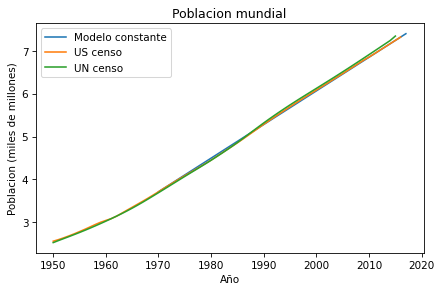

In [85]:
#variables
t_inicial = 1970
t_final = 2016

pobl_incial = censo[t_inicial]
pobl_final = censo[t_final]

#cálculo del incremento de la población total y anual
cant_anios = t_final - t_inicial
incremento_total = pobl_final - pobl_incial
incremento_anual = incremento_total / cant_anios

def simulacion_constante():
  '''
  Función que calcula la población en base a un incremento constante
  '''
  poblacion = ms.TimeSeries()
  poblacion[t_inicial] = censo[t_inicial] #Asigno el año y valor inicial de la población en TimeSeries()

  for t in ms.linrange(t_inicial, t_final):
    poblacion[t+1] = poblacion[t] + incremento_anual #cálculo de la población sgte. año
  return poblacion

def grafico(poblacion):
  poblacion.plot(label="Modelo constante")
  censo.plot(label="US censo")
  un.plot(label="UN censo")
  ms.decorate(title='Poblacion mundial', xlabel='Año', ylabel='Poblacion (miles de millones)')

#Ejecutamos la simulación y los gráficos
pobl = simulacion_constante()
grafico(pobl)


Definimos las funciones *state()* y *system()*:

*   La función state() contiene las variables que definen el estado del sistema.
*   La función System() contiene los parámetros de la simulación.

In [86]:
import modsim as ms
import pandas
from matplotlib import pyplot

"""
ms.State: estado del sistema, cambia con la evolucion de la simulación.
    bikeshare: cantidad de bicicletas en cada lado
    poblacional: la poblacion en cada instante de simulación
    Son variables que define el estado del sistema y cambian step a step


ms.System:
    bikeshare: cantidad de bicicletas en total, la cantidad de destinos, tasas de partida de cada lado, etc.
    poblacional: tiempo inicial, crecimiento anual, tiempo final, ...
    Puede ser que varien o no, pero son valores que dependen del sistema, no son propios de la simulación.
    Son generalmente constantes durante toda la simulación, son las que configuran la simulación.
"""

'\nms.State: estado del sistema, cambia con la evolucion de la simulación.\n    bikeshare: cantidad de bicicletas en cada lado\n    poblacional: la poblacion en cada instante de simulación\n    Son variables que define el estado del sistema y cambian step a step\n\n\nms.System:\n    bikeshare: cantidad de bicicletas en total, la cantidad de destinos, tasas de partida de cada lado, etc.\n    poblacional: tiempo inicial, crecimiento anual, tiempo final, ...\n    Puede ser que varien o no, pero son valores que dependen del sistema, no son propios de la simulación.\n    Son generalmente constantes durante toda la simulación, son las que configuran la simulación.\n'

In [87]:
sistema = ms.System(
        t_0 = t_inicial,
        t_end = t_final,
        crecimiento_anual = crecimiento_anual,
        p_0 = pobl_incial)

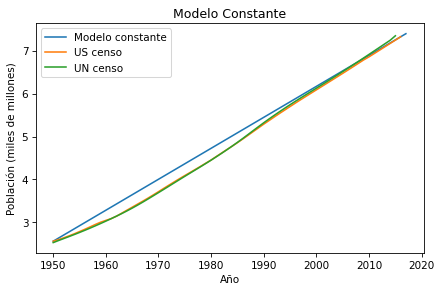

In [88]:
### Obtención de tablas de la web
wiki = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"
tablas = pandas.read_html(wiki, header=0,index_col=0, decimal='M')
tabla_poblacion = tablas[2]
tabla_poblacion.columns = [ 'census' , 'prb' , 'un' , 'maddison' ,'hyde' , 'tanton' , 'biraben' , 'mj' ,'thomlinson' , 'durand' , 'clark' ]
censo = tabla_poblacion.census/1e9
un = tabla_poblacion.un/1e9


### Simulación
def simulacion_cte(sistema):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0

    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = resultado[t] + sistema.crecimiento_anual
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    poblacion.plot(label="Modelo constante")
    censo.plot(label="US censo")
    un.plot(label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')


t_0 = 1970
t_end = 2016
p_0 = censo[t_0]
p_end = censo[t_end]
#t_end = 2030

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,)

res = simulacion_cte(sistema)
plot_resultado(censo, un, res, "Modelo Constante")

In [89]:
type(sistema)

modsim.System

## Modelo proporcional

Tomamos una tasa de natalidad y mortalidad se  mantienen constantes dte toda la simualción. Dónde inicializamos estos parámetros?

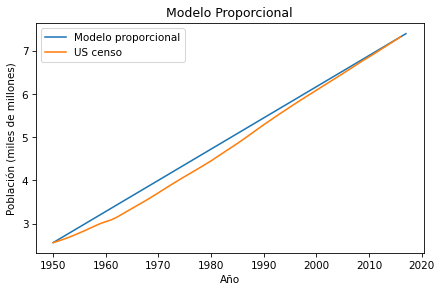

In [90]:
### Simulación

def simulacion_proporcional(sistema):
    """
    Crecimiento proporcional, basado en tasas de natalidad y mortalidad
    """
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0

    for t in ms.linrange(sistema.t_0, sistema.t_end):
        nacimientos = sistema.tasa_nat * resultado[t] #la población anterior por la tasa de natalidad
        muertes = sistema.tasa_mort * resultado[t]
        resultado[t+1] = resultado[t] + nacimientos - muertes #calculo la nueva población en t+1
    return resultado

### Variables

t_0 = 1955
t_end = 2016
p_0 = censo[t_0]
p_end = censo[t_end]
#t_end = 2030

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01)


def plot_resultado(censo, un, resultado, titulo):
    poblacion.plot(label="Modelo proporcional")
    censo.plot(label="US censo")
    #un.plot(label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')


resultado = simulacion_proporcional(sistema)
plot_resultado(censo, un, resultado, "Modelo Proporcional")

Definimos la funcion de step() para que sea argumento de la función de simulación y no tengamos que hacer muchas funciones de simulación ya que hay líneas que se repiten en ambas.


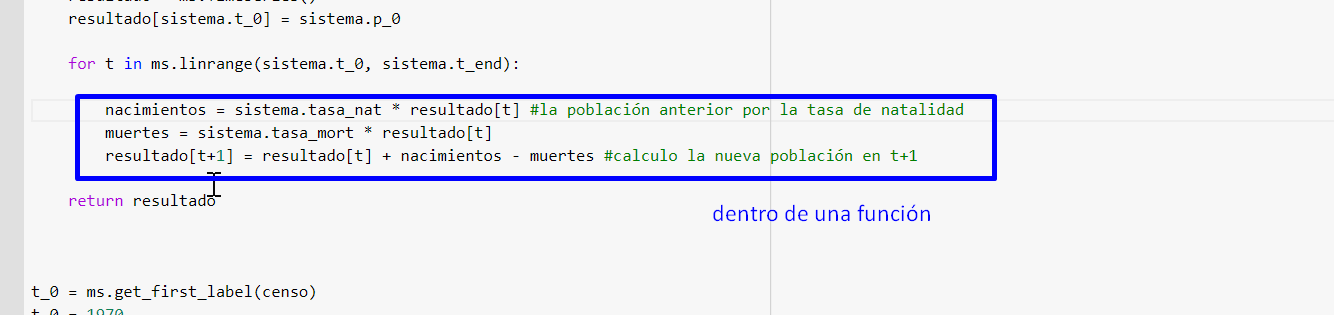

In [91]:
def step_constante(poblacion, t, sistema):
    '''
      Función de actualización de la población - Modelo constante
    '''
    pobl_cte = poblacion[t] + sistema.crecimiento_anual
    return pobl_cte

def step_proporcional(poblacion, t, sistema):
    '''
      Función de actualización de la población - Modelo proporcional
    '''
    nacimientos = sistema.tasa_nat * poblacion[t]
    muertes = sistema.tasa_mort * poblacion[t]
    pobl_prop = poblacion[t] + nacimientos - muertes
    #print("Años y Poblaciones", t+1, pobl_prop) #tengo guardadas los años y las poblaciones calculadas por el modelo
    return pobl_prop

Time
1950    2.557629
1951    2.601108
1952    2.645327
1953    2.690298
1954    2.736033
          ...   
2013    7.397032
2014    7.522782
2015    7.650669
2016    7.780731
2017    7.913003
Name: Quantity, Length: 68, dtype: float64


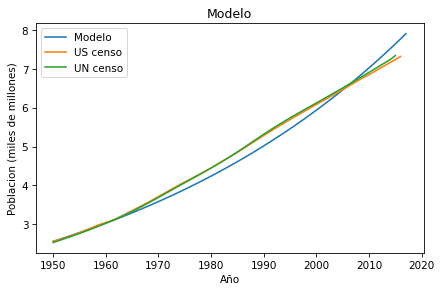

In [92]:
def step_constante(poblacion, t, sistema):
    '''
      Función de actualización de la población - Modelo constante
    '''
    pobl_cte = poblacion[t] + sistema.crecimiento_anual
    return pobl_cte

def step_proporcional(poblacion, t, sistema):
    '''
      Función de actualización de la población - Modelo proporcional
    '''
    nacimientos = sistema.tasa_nat * poblacion[t]
    muertes = sistema.tasa_mort * poblacion[t]
    pobl_prop = poblacion[t] + nacimientos - muertes
    #print("Años y Poblaciones", t+1, pobl_prop) #tengo guardadas los años y las poblaciones calculadas por el modelo
    return pobl_prop

### Simulación
def simulacion(sistema, step_fn): #la función step se pasa por parámetro y es lo que varía el tipo de simulación
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):

        resultado[t+1] = step_fn(resultado, t, sistema)       #Acá llamo a la función step()

    return resultado ##tengo guardado los años y las poblaciones calculadas por el modelo


def plot_resultado(censo, un, resultado, titulo):
    resultado.plot(label="Modelo")
    censo.plot(label="US censo")
    un.plot(label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Poblacion (miles de millones)')


t_0 = 1950
t_end = 2016
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01)

res = simulacion(sistema, step_proporcional)
plot_resultado(censo, un, res, "Modelo")
print(res) # es lo que devuelve la funcion simulacion

Encontramos una manera de simplificar las ecuaciones haciendo uso de un parámetro: *alpha*

(1) nacimientos = tasa_nat * poblacion

(2) muertes = tasa_mort * poblacion

(3) pobl_prop = poblacion + nacimientos - muertes



Reemplazo 1 y 2 en 3



poblacion_proporcional = poblacion + (tasa_nat*poblacion) - (tasa_mort * poblacion)

Sacando FC poblacion:
poblacion_proporcional = poblacion + poblacion(tasa_nat - tasa_mort)

A esta diferencia de contantes (tasa_nat - tasa_mort) llamamos *alpha*

Donde agregamos el parámetro *alpha*?

In [93]:
alpha = sistema.tasa_nat - sistema.tasa_mort
sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01,
        alpha = alpha)

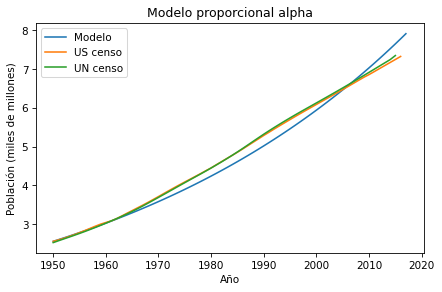

In [94]:
def step_proporcional_alpha(poblacion, t, sistema):
    '''
      Función de actualización de la población - Modelo proporcional
    '''
    pobl_prop = poblacion[t] + alpha * poblacion[t]
    return pobl_prop


def step_proporcional(poblacion, t, sistema):
    '''
      Función de actualización de la población - Modelo proporcional
    '''
    nacimientos = sistema.tasa_nat * poblacion[t]
    muertes = sistema.tasa_mort * poblacion[t]
    pobl_prop = poblacion[t] + nacimientos - muertes
    return pobl_prop

### Simulación
def simulacion(sistema, step_fn):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_fn(resultado, t, sistema)       #step()
    return resultado


def plot_resultado(censo, un, resultado, titulo):
    resultado.plot(label="Modelo")
    censo.plot(label="US censo")
    un.plot(label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')

t_0 = 1950
t_end = 2016
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo
alpha = sistema.tasa_nat - sistema.tasa_mort

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01,
        alpha = alpha)

res_alpha = simulacion(sistema, step_proporcional_alpha)
#res_prop = simulacion(sistema, step_proporcional)
#plot_resultado(censo, un, res_prop, "Modelo proporcional")
plot_resultado(censo, un, res_alpha, "Modelo proporcional alpha")

###Ajustando el modelo proporcional
La curva resultante se ajusta bien hasta el año 1970. Luego la estimación y los valores históricos difieren mucho como para aceptar el modelo. Por lo tanto, para ajustar mejor la curva se agrega un nuevo parámetro.
```
# < 1970
alpha1 = tasa_nat - tasa_mort

# > 1970
alpha2 = tasa_nat - tasa_mort + 0.0005

alpha = 0.025
```


Agregar alpha 1 y 2 a System()

In [95]:
# < 1970
alpha1 = sistema.tasa_nat - sistema.tasa_mort

# > 1970
alpha2 = sistema.tasa_nat - sistema.tasa_mort + 0.0020

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01,
        alpha = alpha,
        alpha1 = alpha1,
        alpha2 = alpha2)

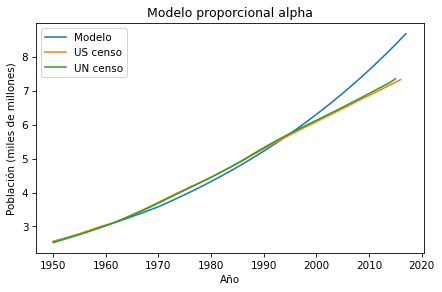

In [96]:
def step_proporcional_alphas(poblacion, t, sistema):

    if t < 1970:
        crecimiento_neto = sistema.alpha1 * poblacion[t]
    else:
        crecimiento_neto = sistema.alpha2 * poblacion[t]


    return poblacion[t] + crecimiento_neto

res_alphas = simulacion(sistema, step_proporcional_alphas)
plot_resultado(censo, un, res_alphas, "Modelo proporcional alpha")

In [97]:
sistema

namespace(t_0=1950,
          t_end=2016,
          crecimiento_anual=0.07224800083333333,
          p_0=2.557628654,
          tasa_nat=0.027,
          tasa_mort=0.01,
          alpha=0.017,
          alpha1=0.017,
          alpha2=0.019000000000000003)

## Modelo cuadrático



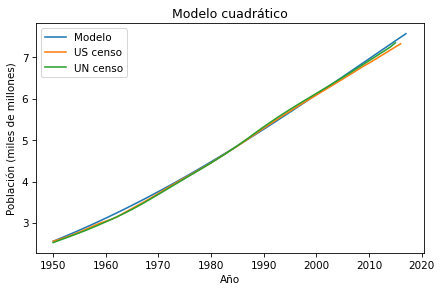

In [98]:
def step_cuadratico(poblacion, t, sistema):
    crecimiento_neto = sistema.alpha * poblacion[t] + sistema.beta * poblacion[t]**2
    return poblacion[t] + crecimiento_neto


### Simulación
def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    resultado.plot(label="Modelo")
    censo.plot(label="US censo")
    un.plot(label="UN censo")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Población (miles de millones)')


t_0 = 1950
t_end = 2016
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01)

sistema.alpha = 0.025
sistema.beta = -0.0018

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadrático")